<a href="https://colab.research.google.com/github/pramod4A3/Data/blob/main/ml_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()


Saving ML task.zip to ML task.zip


In [3]:
import zipfile

# Replace 'ML task.zip' with the actual filename of your ZIP file
with zipfile.ZipFile('ML task.zip', 'r') as zip_ref:
    zip_ref.extractall('ML_task/')


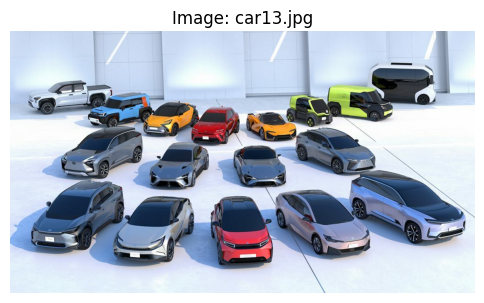

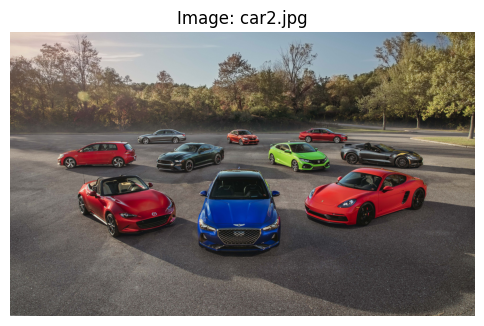

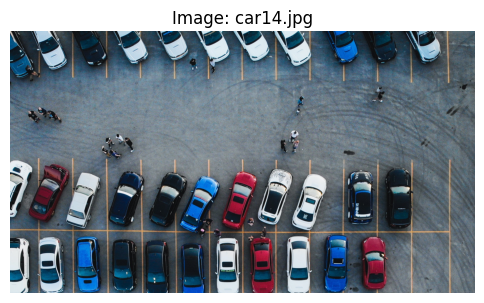

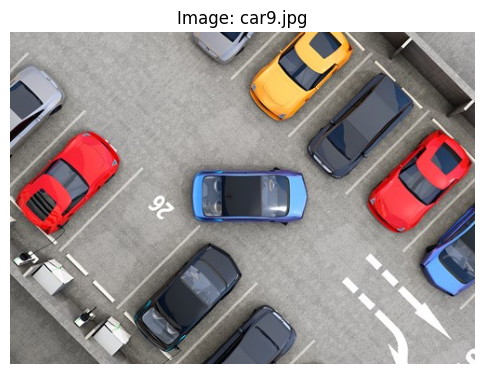

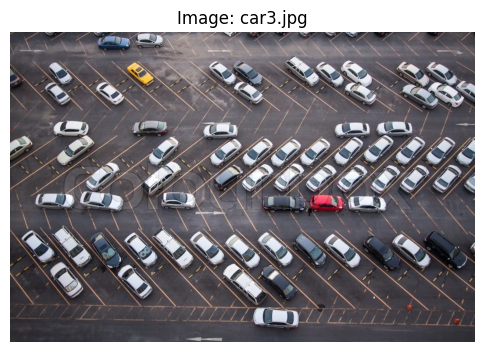

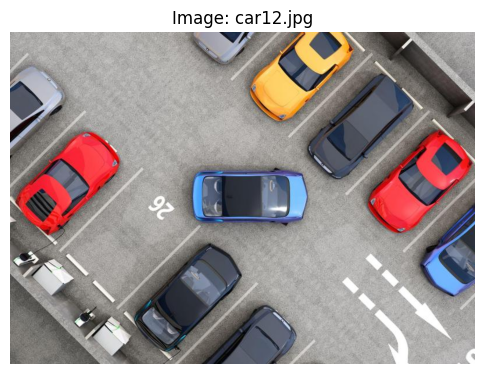

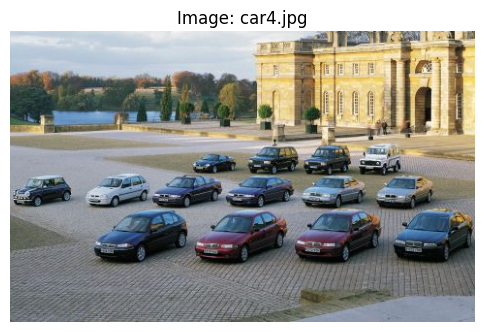

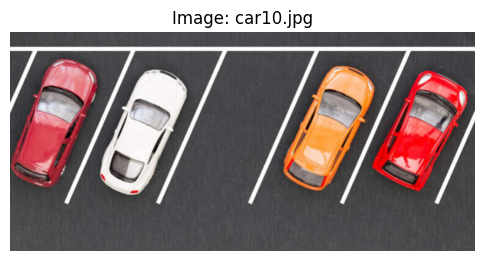

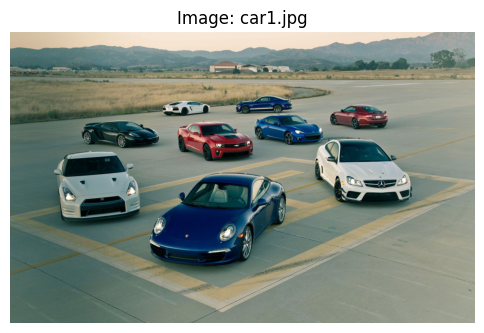

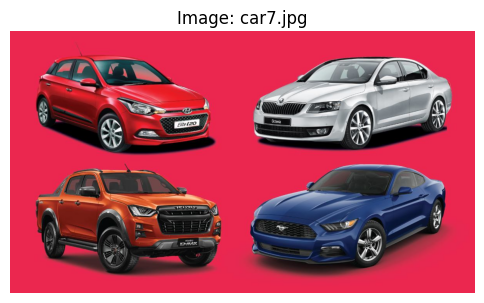

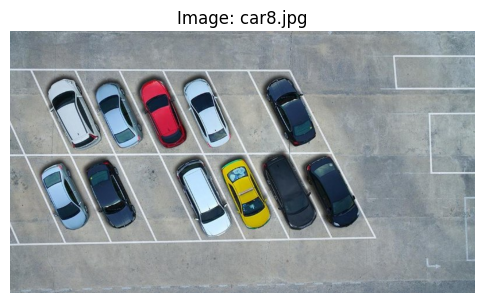

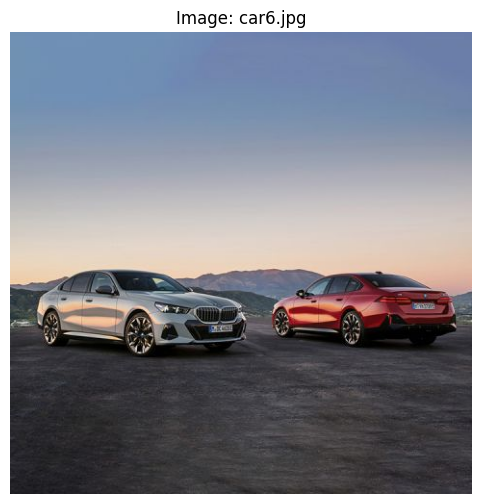

In [4]:
import cv2
import matplotlib.pyplot as plt
import os

# Define the path to the directory where the images are stored
image_dir = '/content/ML_task/ML task dataset'

# List all image files in the directory
image_files = [f for f in os.listdir(image_dir) if f.endswith('.jpg')]

# Load and visualize the images
for image_file in image_files:
    image_path = os.path.join(image_dir, image_file)
    img = cv2.imread(image_path)

    # Display the image
    plt.figure(figsize=(6, 6))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f'Image: {image_file}')
    plt.axis('off')
    plt.show()


In [5]:
import numpy as np

# Define a function to preprocess an image
def preprocess_image(image_path, target_size):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB format
    img = cv2.resize(img, target_size)  # Resize the image to the target size
    img = img / 255.0  # Normalize pixel values to the range [0, 1]
    return img

# Define the target size for your images (e.g., 224x224)
target_size = (224, 224)

# Preprocess all images and store them in a list
preprocessed_images = []

for image_file in image_files:
    image_path = os.path.join(image_dir, image_file)
    preprocessed_img = preprocess_image(image_path, target_size)
    preprocessed_images.append(preprocessed_img)

# Convert the list of images to a NumPy array
X = np.array(preprocessed_images)


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# Clone the Darknet repository
!git clone https://github.com/AlexeyAB/darknet.git

# Navigate to the Darknet folder
%cd darknet

# Compile Darknet with GPU support (CUDA and CUDNN)
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!make

Cloning into 'darknet'...
remote: Enumerating objects: 15769, done.
remote: Counting objects: 100% (231/231), done.
remote: Compressing objects: 100% (140/140), done.
remote: Total 15769 (delta 118), reused 162 (delta 89), pack-reused 15538
Receiving objects: 100% (15769/15769), 14.62 MiB | 16.15 MiB/s, done.
Resolving deltas: 100% (10552/10552), done.
/content/darknet
mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -rdynamic -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used []8;;https://gcc.gn

In [8]:
# Install necessary libraries
!pip install tensorflow opencv-python-headless

# Import libraries
import tensorflow as tf
import cv2
import numpy as np

# Check GPU availability
print("GPU available:", tf.test.is_gpu_available())


Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


GPU available: True


In [9]:
!git clone https://github.com/pjreddie/darknet

fatal: destination path 'darknet' already exists and is not an empty directory.


In [10]:
!wget https://pjreddie.com/media/files/yolov3.weights

--2023-09-26 06:00:00--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  19.3MB/s    in 13s     

2023-09-26 06:00:14 (18.2 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [11]:
!vi cfg/yolov3.cfg

>[>4;m8Vim: Caught deadly signal TERM
Vim: Finished.
^C


In [ ]:
!pip install pyqt5 lxml
!git clone https://github.com/tzutalin/labelImg.git

ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 169, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 242, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 377, in run
    requirement_set = resolver.resolve(
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/resolution/resolvelib/resolver.py", line 92, in resolve
    result = self._result = resolver.resolve(
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/resolvelib/resolvers.py", line 546, in resolve
    state = resolution.resolve(requirements, max_rounds=max_rounds)
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/resolvelib/resolvers.py", line 397, in resolve
    self._add_to_criteria(self.state.criteria, r, parent

In [ ]:
%cd labelImg

In [ ]:
!pip install labelImg


In [ ]:
!labelImg


In [ ]:
!python labelImg.py

In [ ]:
!git clone https://github.com/AlexeyAB/darknet.git

In [18]:
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!make

gcc -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -rdynamic -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/activations.c -o obj/activations.o
./src/activations.c: In function ‘activate’:
./src/activations.c:79:5: warning: enumeration value ‘RELU6’ not handled in switch []8;;https://gcc.gnu.org/onlinedocs/gcc/Warning-Options.html#index-Wswitch-Wswitch]8;;]
   79 |     switch(a){
      |     ^~~~~~
./src/activations.c:79:5: warning: enumeration value ‘SWISH’ not handled in switch []8;;https://gcc.gnu.org/onlinedocs/gcc/Warning-Options.html#index-Wswitch-Wswitch]8;;]
./src/activations.c:79:5: warning: enumeration value ‘MISH’ not handled in switch []8;;https://gcc.gnu.org/onlinedocs/gcc/Warning-Options.html#index-Wswitch-Wswitch]8;;]
./src/activations.c:79:5: warning: enumeration val

In [19]:
!pip install tensorflow opencv-python-headless

In [20]:
!touch /content/darknet/data.data


In [21]:
!wget https://github.com/pjreddie/darknet/blob/master/cfg/yolov3.cfg -O /content/darknet/yolov3.cfg


--2023-09-26 06:04:21--  https://github.com/pjreddie/darknet/blob/master/cfg/yolov3.cfg
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 46102 (45K) [text/plain]
Saving to: ‘/content/darknet/yolov3.cfg’

/content/darknet/yo 100%[===================>]  45.02K  --.-KB/s    in 0.005s  

2023-09-26 06:04:21 (8.42 MB/s) - ‘/content/darknet/yolov3.cfg’ saved [46102/46102]



In [22]:
!wget https://pjreddie.com/media/files/darknet53.conv.74 -O /content/darknet/darknet53.conv.74

--2023-09-26 06:04:21--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘/content/darknet/darknet53.conv.74’

/content/darknet/da 100%[===================>] 154.96M  11.4MB/s    in 15s     

2023-09-26 06:04:37 (10.6 MB/s) - ‘/content/darknet/darknet53.conv.74’ saved [162482580/162482580]



In [23]:
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!make

chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -rdynamic -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used []8;;https://gcc.gnu.org/onlinedocs/gcc/Warning-Options.html#index-Wunused-but-set-variable-Wunused-but-set-variable]8;;]
  946 |                 float rgb[3];
      |                       ^~~
./src/image_opencv.cpp: In function ‘void cv_draw_object(image, float*, int, int, int*, float*, int*, int, char**)’:
./src/image_opencv.cpp:1444:14: warning: unused variable ‘buff’ []8;;https://gcc.gnu.org/onlinedocs/gcc/Warn

In [24]:
import tensorflow as tf
print("GPU available:", tf.test.is_gpu_available())


GPU available: True


In [25]:
!wget https://pjreddie.com/media/files/yolov3.weights


--2023-09-26 06:06:18--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  11.7MB/s    in 21s     

2023-09-26 06:06:40 (11.2 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [ ]:
# Load the TensorFlow library
import tensorflow as tf

# Load the YOLOv3 model checkpoint
yolov3_model = tf.keras.models.load_model('/content/darknet/yolov3.weights')

# Define a function to preprocess an image
def preprocess_image(image_path):
    img = tf.io.read_file(image_path)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.resize(img, (416, 416))
    img = img / 255.0  # Normalize pixel values to the range [0, 1]
    img = tf.expand_dims(img, 0)  # Add batch dimension
    return img

# Load an image for inference (replace 'image_path' with your image path)
image_path = '/content/ML_task/ML task dataset/car1.jpg'
input_image = preprocess_image(image_path)

# Perform inference using the YOLOv3 model
detections = yolov3_model.predict(input_image)

# Process the detections as needed
# (e.g., extract class, bounding box coordinates, and confidence scores)

# Visualize the detected objects on the original image using OpenCV or Matplotlib
# You can use the `detections` and the original image for visualization
